In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as sp
import datetime as dt

In [2]:
trends_df = pd.read_csv('trends1.csv')
trends_df = trends_df.loc[:, ~trends_df.columns.str.contains('^Unnamed')] #dropping innamed columns 

In [3]:
trends_df["date"] = pd.to_datetime(trends_df['date'])
trends_df = trends_df.sort_values(by='date',ascending=True)

In [4]:
trends_df['month_year'] = trends_df['date'].apply(lambda x:x.strftime('%Y-%m')) 

<h4> Grouped by Month as we can see that,these are the weekly sales<br>and we can use monthly data for clear understanding of the sales trend

In [5]:
df_monthly_sales=trends_df.groupby('month_year').sum().reset_index()
df_monthly_sales['month_year'] = pd.to_datetime(df_monthly_sales['month_year'])

In [6]:
df_monthly_sales.set_index('month_year',inplace=True)

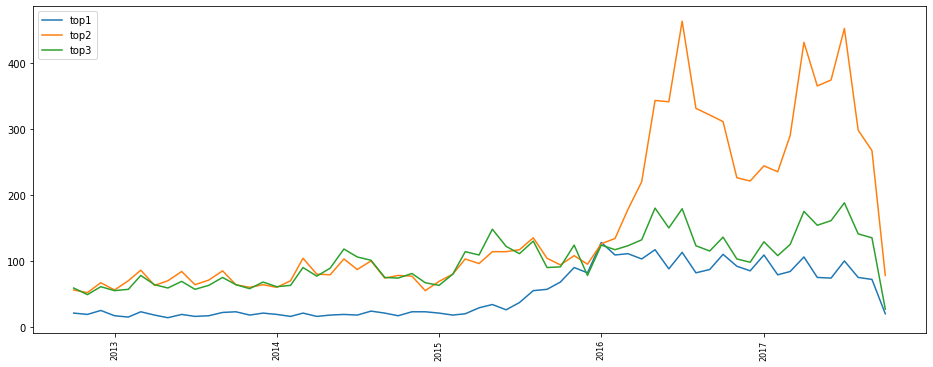

In [7]:
plt.figure(figsize=(16,6))
plt.xticks(rotation='vertical',size = 8)
top1, = plt.plot(df_monthly_sales['top 1'],label="top1")
top2, = plt.plot(df_monthly_sales['top 2'],label="top2")
top3, = plt.plot(df_monthly_sales['top 3'],label="top3")
leg = plt.legend(loc='upper left')
plt.show()

<h4> This graph represents all the ratings graph  

In [58]:
def draw_trend_line(trend,xf1,yf,name = ''):
    f, ax = plt.subplots(1, 1)
    ax.plot(xf1, yf,label='Linear fit {}'.format(name), lw=5)
    trend[-0:].plot(ax=ax,marker='.', ls='')
    plt.ylabel('trends concentration')
    ax.legend()

In [60]:
def calculte_and_show_slope(trend,last_n_month=0,name=''): 
    y=np.array(trend[-last_n_month:].values, dtype=float)
    x=np.array(pd.to_datetime(trend[-last_n_month:].index).values, dtype=float)
    x1 = np.array(pd.to_datetime(trend[-last_n_month:].index).map(dt.datetime.toordinal), dtype=float) 
    
    slope1, _, _, _, _ =sp.linregress(x1,y)
    slope, intercept, r_value, p_value, std_err =sp.linregress(x,y) 
    xf = np.linspace(min(x),max(x),100)
    xf1 = xf.copy()
    xf1 = pd.to_datetime(xf1)
    yf = (slope*xf)+intercept
    # print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)
    draw_trend_line(trend,xf1,yf,name)
    return slope1

In [61]:
def calculate_and_show_trend(analysis):
    decompose_result_mult = seasonal_decompose(analysis, model="multiplicative",extrapolate_trend= 'freq')
    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid
    return trend

top 1 groth rate 5.598002703633813


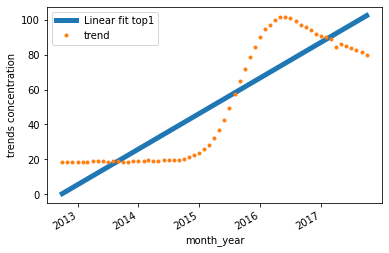

In [65]:
analysis1 = df_monthly_sales[['top 1']].copy()
trend1 = calculate_and_show_trend(analysis1)
top1_groth = calculte_and_show_slope(trend1,name ='top1')
print('top 1 groth rate {}'.format(top1_groth*100))

top 2 groth rate 18.541584614487473


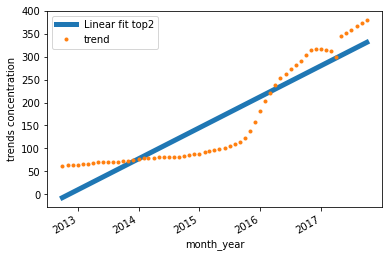

In [66]:
analysis2 = df_monthly_sales[['top 2']].copy()
trend2 = calculate_and_show_trend(analysis2)
top2_groth =calculte_and_show_slope(trend2,name ='top2')
print('top 2 groth rate {}'.format(top2_groth*100))

top 3 groth rate 5.44698582443648


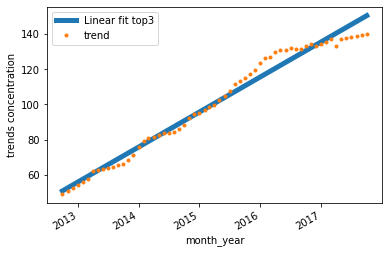

In [67]:
analysis3 = df_monthly_sales[['top 3']].copy()
trend3 = calculate_and_show_trend(analysis3)
top3_groth =calculte_and_show_slope(trend3,name ='top3')
print('top 3 groth rate {}'.format(top3_groth*100))

<h4> from this monthly data plot we can see top 2 is the best performing .<br>
    because we can observe an uptrend that is 18.54% clearly significatly higher than<br>
    top 1 (5.598%) and top3 (5.4469%)<br>
    so the bet performing serial is<br>
    - top2 with 18.54% trend<br>
    - top1 with 5.598% trend<br>
    - top3 with 5.4469% trend<br>
    

In [8]:
df_monthly_sales.head()

,top 1,top 2,top 3
month_year,,,
2012-10-01,21,56,59
2012-11-01,19,52,49
2012-12-01,25,67,61
2013-01-01,17,56,55
2013-02-01,15,70,57


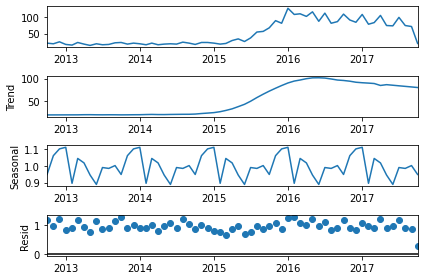

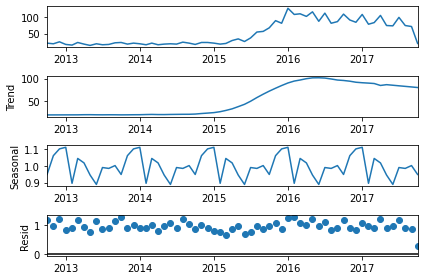

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis3 = df_monthly_sales[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis3, model="multiplicative",extrapolate_trend= 'freq')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid
decompose_result_mult.plot()

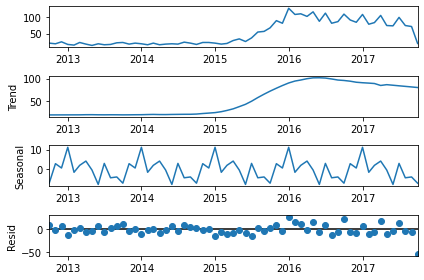

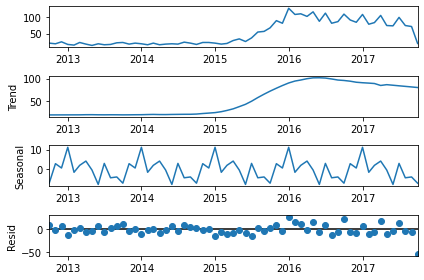

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis4 = df_monthly_sales[['top 1']].copy()

decompose_result_mult4 = seasonal_decompose(analysis4, model="additive",extrapolate_trend= 'freq' )

trend4 = decompose_result_mult4.trend
seasonal4 = decompose_result_mult4.seasonal
residual4 = decompose_result_mult4.resid
decompose_result_mult4.plot()

In [13]:
trend.tail(50)

month_year
2013-09-01     18.750000
2013-10-01     18.583333
2013-11-01     18.666667
2013-12-01     18.833333
2014-01-01     18.916667
2014-02-01     19.291667
2014-03-01     19.541667
2014-04-01     19.250000
2014-05-01     19.208333
2014-06-01     19.500000
2014-07-01     19.666667
2014-08-01     19.833333
2014-09-01     19.875000
2014-10-01     20.375000
2014-11-01     21.583333
2014-12-01     22.541667
2015-01-01     23.625000
2015-02-01     25.708333
2015-03-01     28.500000
2015-04-01     32.125000
2015-05-01     37.041667
2015-06-01     42.291667
2015-07-01     49.208333
2015-08-01     57.458333
2015-09-01     65.041667
2015-10-01     71.916667
2015-11-01     78.458333
2015-12-01     84.500000
2016-01-01     90.250000
2016-02-01     94.541667
2016-03-01     96.916667
2016-04-01     99.916667
2016-05-01    101.750000
2016-06-01    101.958333
2016-07-01    101.291667
2016-08-01     99.250000
2016-09-01     96.875000
2016-10-01     95.875000
2016-11-01     94.250000
2016-12-01    

In [15]:
import scipy.stats as sp
y=np.array(trend[-0:].values, dtype=float)
x=np.array(pd.to_datetime(trend[-0:].index).values, dtype=float)

In [16]:
slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)
xf = np.linspace(min(x),max(x),100)
xf1 = xf.copy()
xf1 = pd.to_datetime(xf1)
yf = (slope*xf)+intercept
print('r = ', r_value, '\n', 'p = ', p_value, '\n', 's = ', std_err)

r =  0.8862180554274874 
 p =  2.2352864454327492e-21 
 s =  4.409459787812541e-17


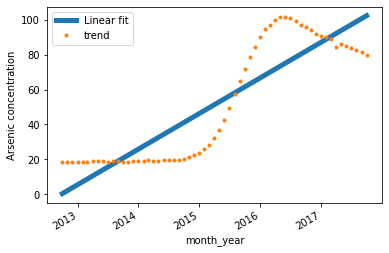

In [18]:
f, ax = plt.subplots(1, 1)
ax.plot(xf1, yf,label='Linear fit', lw=5)
trend[-0:].plot(ax=ax,marker='.', ls='')
plt.ylabel('Arsenic concentration')
ax.legend();

In [19]:
import datetime as dt
x1=np.array(pd.to_datetime(trend[-0:].index).map(dt.datetime.toordinal), dtype=float)
slope1, intercept, r_value, p_value, std_err =sp.linregress(x1,y)
print(slope1)

0.05598002703633813


In [30]:
trend.tail(50)

month_year
2013-09-01     18.750000
2013-10-01     18.583333
2013-11-01     18.666667
2013-12-01     18.833333
2014-01-01     18.916667
2014-02-01     19.291667
2014-03-01     19.541667
2014-04-01     19.250000
2014-05-01     19.208333
2014-06-01     19.500000
2014-07-01     19.666667
2014-08-01     19.833333
2014-09-01     19.875000
2014-10-01     20.375000
2014-11-01     21.583333
2014-12-01     22.541667
2015-01-01     23.625000
2015-02-01     25.708333
2015-03-01     28.500000
2015-04-01     32.125000
2015-05-01     37.041667
2015-06-01     42.291667
2015-07-01     49.208333
2015-08-01     57.458333
2015-09-01     65.041667
2015-10-01     71.916667
2015-11-01     78.458333
2015-12-01     84.500000
2016-01-01     90.250000
2016-02-01     94.541667
2016-03-01     96.916667
2016-04-01     99.916667
2016-05-01    101.750000
2016-06-01    101.958333
2016-07-01    101.291667
2016-08-01     99.250000
2016-09-01     96.875000
2016-10-01     95.875000
2016-11-01     94.250000
2016-12-01    

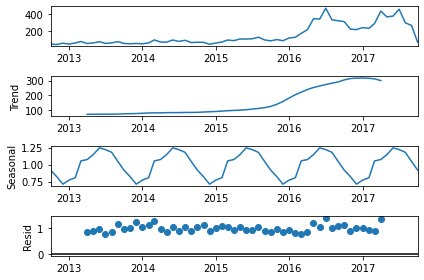

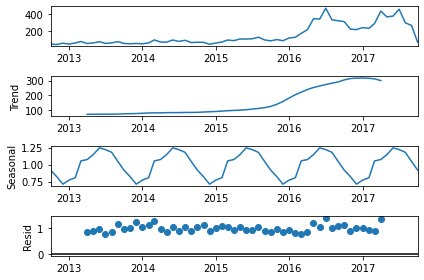

In [28]:
analysis1 = df_monthly_sales[['top 2']].copy()
decompose_result_mult1 = seasonal_decompose(analysis1, model="multiplicative")
trend1 = decompose_result_mult1.trend
seasonal1 = decompose_result_mult1.seasonal
residual1 = decompose_result_mult1.resid
decompose_result_mult1.plot()

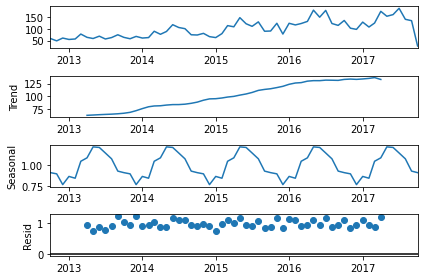

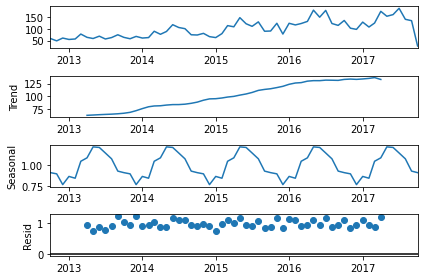

In [29]:
analysis2 = df_monthly_sales[['top 3']].copy()
decompose_result_mult2 = seasonal_decompose(analysis2, model="multiplicative")
trend2 = decompose_result_mult2.trend
seasonal2 = decompose_result_mult2.seasonal
residual2 = decompose_result_mult2.resid
decompose_result_mult2.plot()

In [16]:
# def plot_df(df, x, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
#     plt.figure(figsize=(16,5), dpi=100)
#     plt.plot(x, y1, color='tab:red')
#     plt.plot(x, y2, color='tab:blue')
#     plt.plot(x, y3, color='tab:green')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()

In [18]:
def plot_df(df, y1,y2,y3,title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=100)
    plt.plot( y1, color='tab:red')
    plt.plot( y2, color='tab:blue')
    plt.plot( y3, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

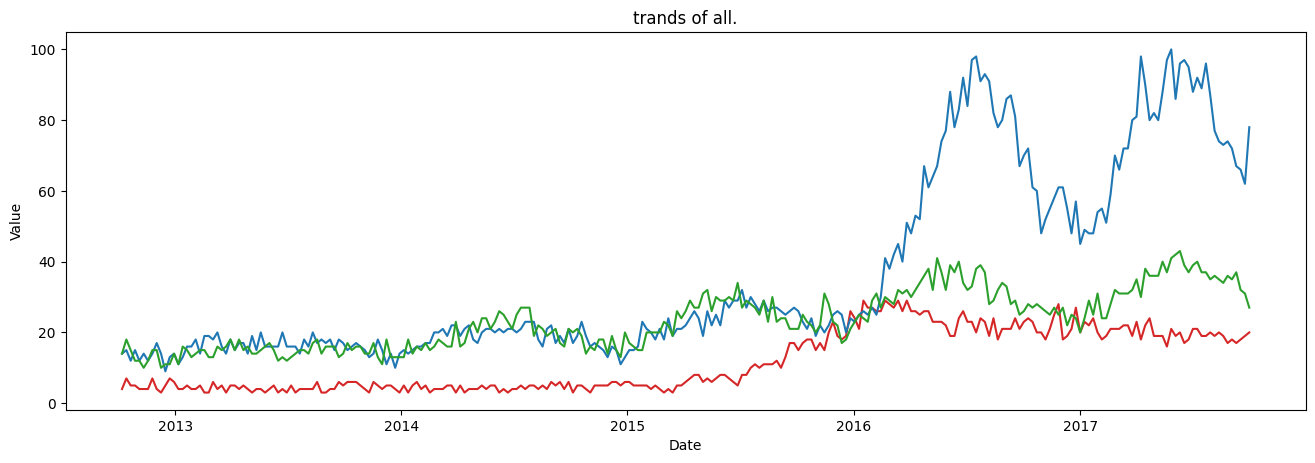

In [19]:
plot_df(trends_df, y1=trends_df['top 1'],y2=trends_df['top 2'],y3=trends_df['top 3'], title='trands of all.')

In [40]:
def plot_ts(ts, plot_ma=True, plot_intervals=True, window=30,
            figsize=(15,5)):    
   rolling_mean = ts.rolling(window=window,center=True).mean()    
   rolling_std = ts.rolling(window=window).std()
   plt.figure(figsize=figsize)    
   plt.title(ts.name)    
   plt.plot(ts[window:], label='Actual values', color="black")    
   if plot_ma:        
      plt.plot(rolling_mean, 'g', label='MA'+str(window),
               color="red")    
   if plot_intervals:
      lower_bound = rolling_mean - (1.96 * rolling_std)
      upper_bound = rolling_mean + (1.96 * rolling_std)
   plt.fill_between(x=ts.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   plt.legend(loc='best')
   plt.grid(True)
   plt.show()

In [41]:
test_ts1 = trends_df['top 1']
test_ts1.head()

date
2012-10-07    4
2012-10-14    7
2012-10-21    5
2012-10-28    5
2012-11-04    4
Name: top 1, dtype: int64

In [30]:
test_ts2 = trends_df['top 2']
test_ts2.head()

date
2012-10-07    14
2012-10-14    15
2012-10-21    12
2012-10-28    15
2012-11-04    12
Name: top 2, dtype: int64

In [6]:
test_ts3 = trends_df['top 3']
test_ts3.head()

date
2012-10-07    14
2012-10-14    18
2012-10-21    15
2012-10-28    12
2012-11-04    12
Name: top 3, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\335832906.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


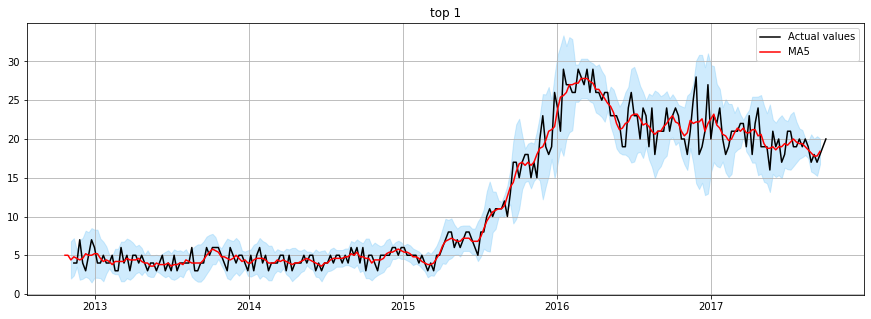

In [48]:
plot_ts(test_ts1, window=5)

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\3209949617.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


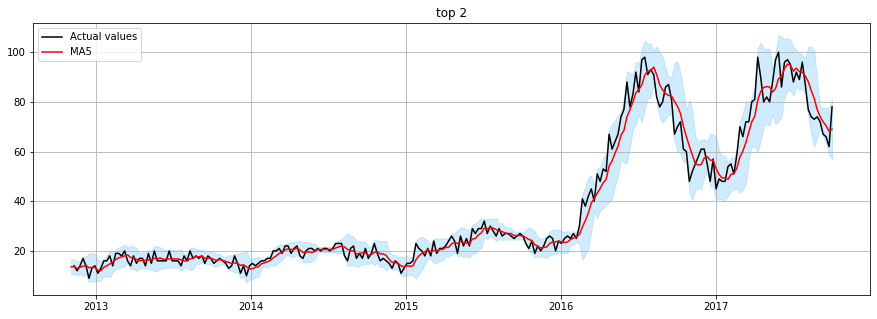

In [33]:
plot_ts(test_ts2, window=5)

C:\Users\USER\AppData\Local\Temp\ipykernel_6868\3209949617.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='MA'+str(window),


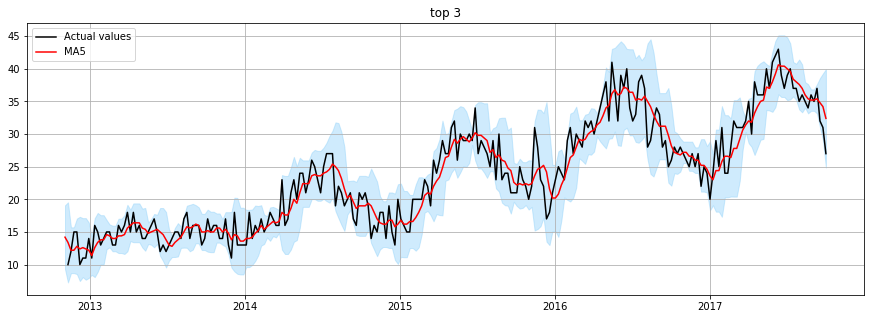

In [34]:
plot_ts(test_ts3, window=5)

In [14]:
# analysis=trends_df['top 3']
analysis = trends_df[['top 1']].copy()
# test_ts3.head()
analysis.head()

,top 1
date,
2012-10-07,4
2012-10-14,7
2012-10-21,5
2012-10-28,5
2012-11-04,4


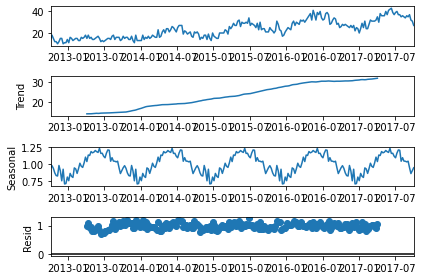

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# data_orig.set_index('Date', inplace=True)

# analysis = test_ts3[['top 3']].copy()
analysis = trends_df[['top 1']].copy()

decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

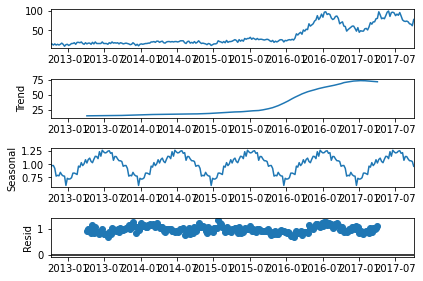

In [16]:
analysis = trends_df[['top 2']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

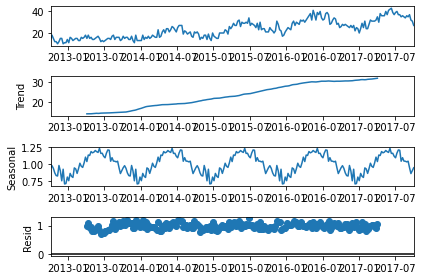

In [17]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

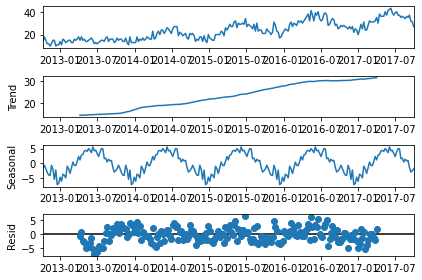

In [22]:
analysis = trends_df[['top 3']].copy()
decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();